## L'ANALYSE EXPLORATOIRE DES DONNES ou EXPLORATORY DATA ANALYSIS (EDA)

. L'Analyse exploratoire des données peut être considérée comme la troisième phase d'un projet de Machine Learning après celles
de la formulation de la problématique et de l'acquisition des données.

L'objectif principal de l'EDA dans un projet de ML est de comprendre au mieux
les données (variables indépendantes et dépendantes), chercher les relatons et 
les interactions éventuelles entre elles afin de mettre en place les stratégies
permettant de faire un prétraitement (data preprocessing ou feature engineering) 
des données intelligent et efficace, chose qui favorisera un entrainement plus efficient
des modèles de ML.

L'EDA est une phase relativement simple mais peut s'avérer également déroutante si l'on ne pas s'y prendre.
Il n'existe pas une seule manière de faire l'EDA car certains datasets sont plus compliqués que d'autres
(nombre de variables, type de données, structure de données, l'impureté des données, la cardinalité des variables ... ).
 Nous verrons au cours de cet exercice, une méthode simple mais efficace pour faire l'EDA sur tout type de dataset.
 En suivant cette démarche, on aura atteint au moins tous les objectifs recherchés en effectuant une EDA.

Parcourons ensemble la liste de vérification (checklist) non exhaustive des tâches effectuées minimales a effectuer
lors d'une EDA.

1. Lire le dataset dans une dataframe pandas
2. Faire une copie du dataset
3. Voir la taille du dataset (nombre de lignes et de colonnes)
4. Visualiser les 5 premières et dernières lignes du dataset et essayer de comprendre les différentes variables
5. Vérifier s'il n'y a pas de colonnes ou de lignes dupliquées
6. Utiliser certaines fonctions de pandas pour voir certaines données statistiques sur le dataset
(maximum,minimum, variance, écart-type, ...)
7. Vérifier l'existence de valeurs manquantes
8. Vérifier l'existence de relation entre les valeurs manquantes et la variable dépendante
9. Visualiser la variable dépendante
10. Diviser le dataset en variables numériques et catégorielles
11. Faire une analyse univariée des variables numériques et catégorielles
12. Vérifier l'existence d'outliers (valeurs abérrantes) et de labels rares
13. Faire une analyse bivariée des variables numériques et catégorielles 
(relations entre les variables indépendantes et la variable dépendante)
14. Faire une analyse entre les variables indépendantes (optionnel)
15. Vérifier la corrélation entre les variables numériques indépendantes et éventuellement entre celles-ci
et la variable dépendante (cas d'une régression)
16. Utiliser des outils de statistique inférientielle (tests statistiques)pour tester
les résultas de certains graphiques (optionnel).
# NB: Il existe des Librairies python permettant d'automatiser l'EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
data = pd.read_csv('BankChurners.csv', )

In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
data.shape

(10127, 23)

In [6]:
# Suppression des 3 dernières colonnes qui contiennent des données inutiles
df = data.iloc[:,0:21]
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [8]:
df.shape

(10127, 21)

In [9]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
# Nombre de valeurs uniques dans chaque colonne
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [12]:
# récupération de la liste des variables de type objet dans une liste

var_cat = [i for i in df.columns if df[i].dtypes == 'O']
var_cat

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [13]:
len(var_cat)

6

In [14]:
# Récupération des variables de type numériques dans une liste

var_num = [i for i in df.columns if df[i].dtypes != 'O']
var_num

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [15]:
len(var_num)

15

In [16]:
# Vérification de l'existence de lignes dupliquées

duplicated_rows = df.duplicated() == True

In [ ]:
# On pouvait également faire df.duplicated().sum(). Cela retourne le nombre de lignes répétées du dataframe

In [17]:
len(df[duplicated_rows])

0

In [18]:
# Fonction pandas fournissant des infos d'ordre général sur le dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [19]:
# Fonction pandas fournissant des données statistiques très intéressantes sur les variables numériques

df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [20]:
# Même méthode pandas mais cette fois sur les variables de type objet

df.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## Visualisation de la target

In [21]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [22]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [23]:
df['Attrition_Flag'].value_counts()/df.shape[0]

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

<AxesSubplot:ylabel='Attrition_Flag'>

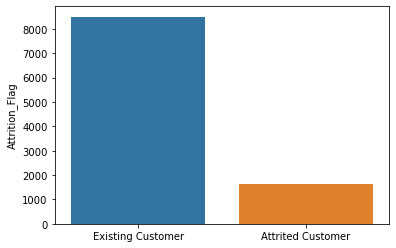

In [24]:
plt.figure()
sns.barplot(x = df['Attrition_Flag'].value_counts().index, y = df['Attrition_Flag'].value_counts())

<AxesSubplot:ylabel='Attrition_Flag'>

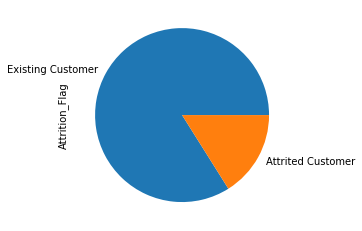

In [25]:
plt.figure()
df['Attrition_Flag'].value_counts().plot.pie()

In [26]:
# Nombre de valeurs uniques dans les variables numériques

for col in var_num:
    print(col,df[col].nunique())

CLIENTNUM 10127
Customer_Age 45
Dependent_count 6
Months_on_book 44
Total_Relationship_Count 6
Months_Inactive_12_mon 7
Contacts_Count_12_mon 7
Credit_Limit 6205
Total_Revolving_Bal 1974
Avg_Open_To_Buy 6813
Total_Amt_Chng_Q4_Q1 1158
Total_Trans_Amt 5033
Total_Trans_Ct 126
Total_Ct_Chng_Q4_Q1 830
Avg_Utilization_Ratio 964


## Analyse univariée des variables numériques

In [27]:
# Laisser la colonne contenant les ID des clients car inutile

var_num = var_num[1:]
var_num

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [29]:
# Séparer les variables numériques en variables continues et discrètes pour les bésoins de visualisation

var_num_cont = [var for var in var_num if df[var].nunique()>7]
var_num_cont

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

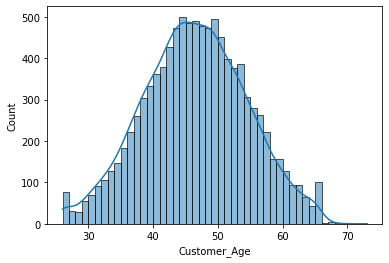

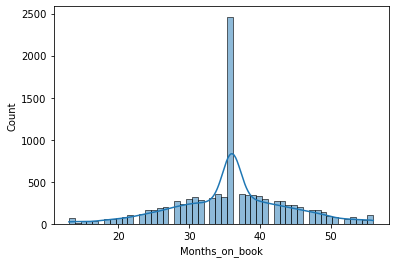

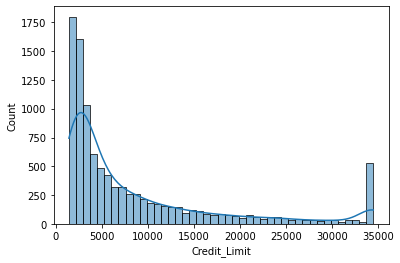

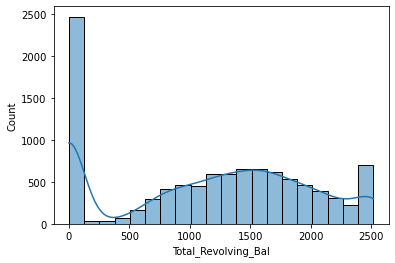

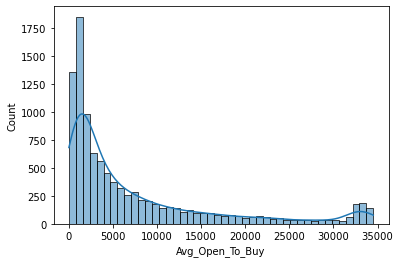

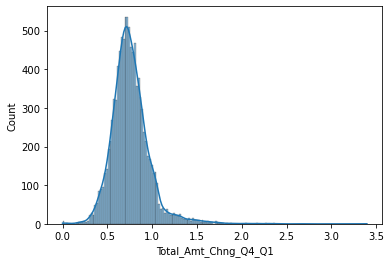

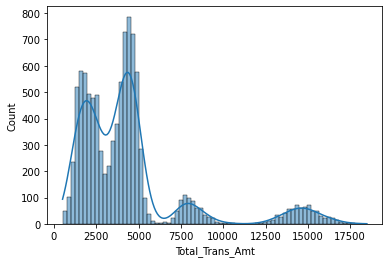

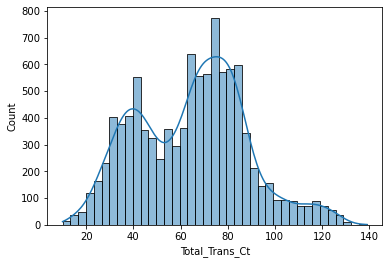

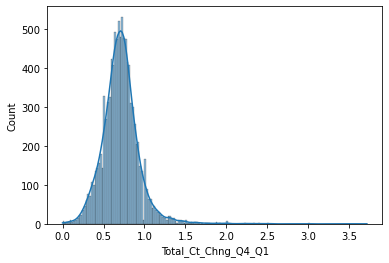

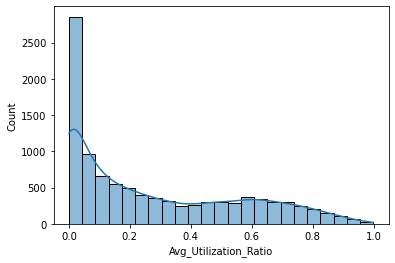

In [30]:
for col in var_num_cont:
    plt.figure()
    sns.histplot(df[col], kde = True)

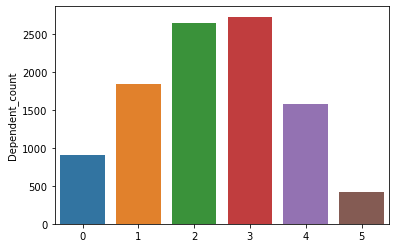

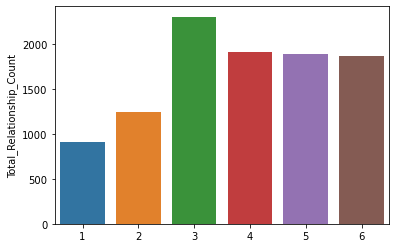

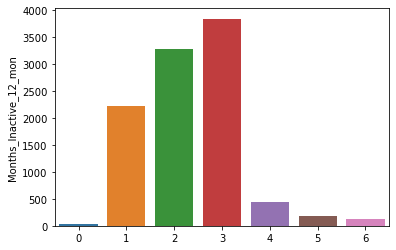

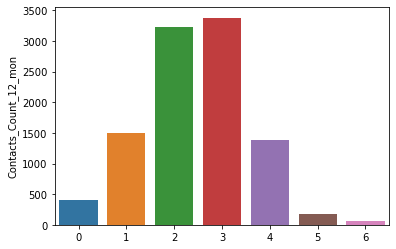

In [31]:
discrete_var = [var for var in var_num if var not in var_num_cont]
for var in discrete_var:
    plt.figure()
    sns.barplot(x=df[var].value_counts().index, y = df[var].value_counts())

## Vérification de l'existence d'outliers dans les variables numériques

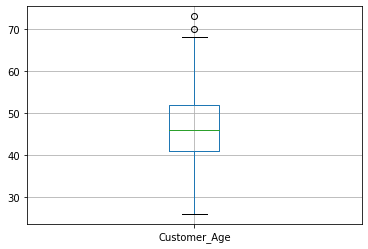

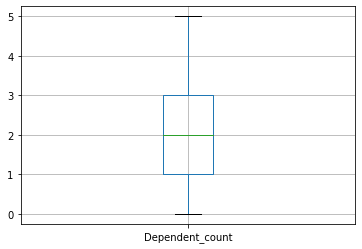

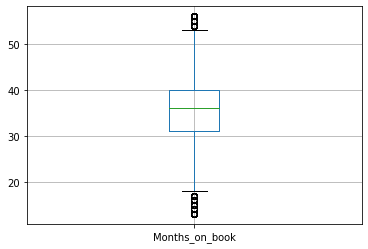

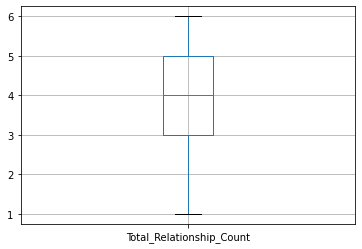

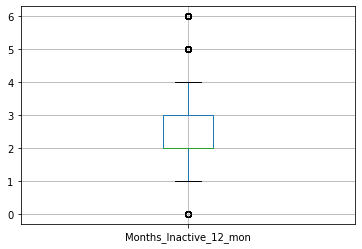

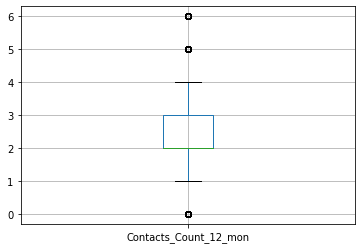

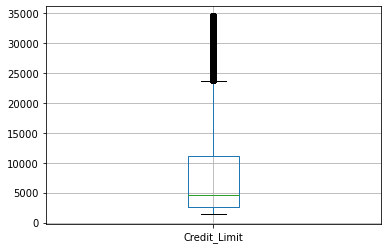

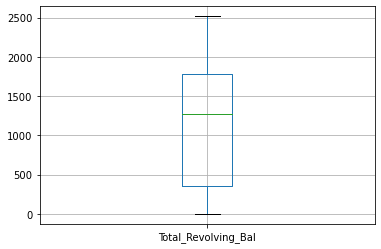

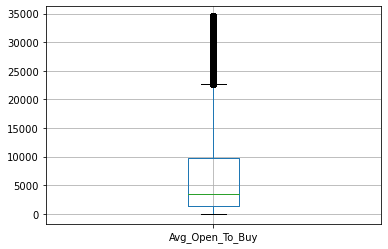

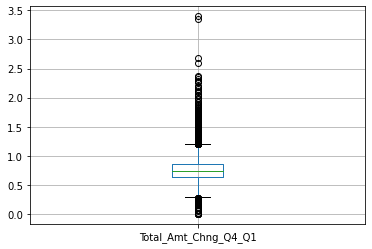

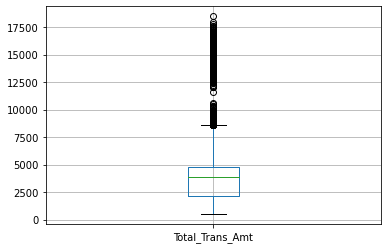

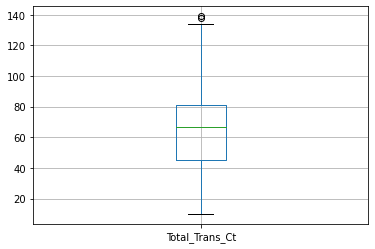

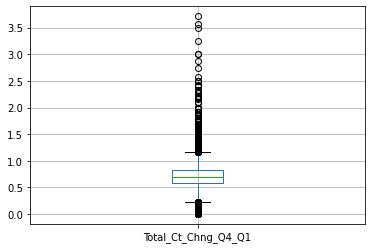

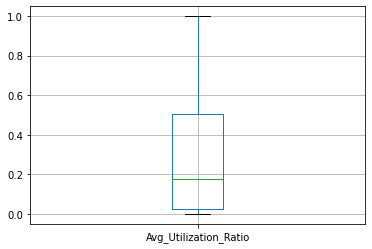

In [32]:
for var in var_num:
    plt.figure()
    df.boxplot(column=var)

## Analyse univariée des variables catégorielles

In [33]:
for var in var_cat:
    print(var, df[var].nunique())

Attrition_Flag 2
Gender 2
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4


In [34]:
for var in var_cat:
    print(var)
    print( df[var].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Gender
F    5358
M    4769
Name: Gender, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [35]:
# Recherche des labels rares
for var in var_cat:
    print(var)
    for label in df[var].unique():
        print (f"{label:-<50} {len (df[df[var] == label])/df.shape[0]}")

Attrition_Flag
Existing Customer--------------------------------- 0.8393403772094401
Attrited Customer--------------------------------- 0.1606596227905599
Gender
M------------------------------------------------- 0.4709193245778612
F------------------------------------------------- 0.5290806754221389
Education_Level
High School--------------------------------------- 0.1987755505085415
Graduate------------------------------------------ 0.308877258813074
Uneducated---------------------------------------- 0.14683519304828677
Unknown------------------------------------------- 0.14999506270366347
College------------------------------------------- 0.10002962377801916
Post-Graduate------------------------------------- 0.05095289819294954
Doctorate----------------------------------------- 0.044534412955465584
Marital_Status
Married------------------------------------------- 0.4628221585859583
Single-------------------------------------------- 0.3893551890984497
Unknown-------------------------

In [36]:
for var in var_cat:
    print(var, df[var].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Gender ['M' 'F']
Education_Level ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']


In [37]:
# Laisser tomber la variable dépendantes car déjà analysée

var_cat = var_cat[1:]

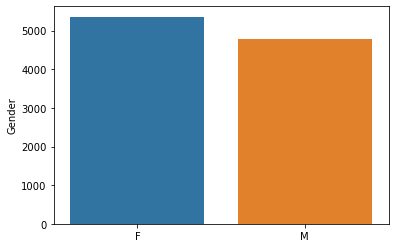

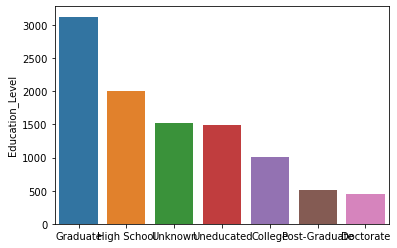

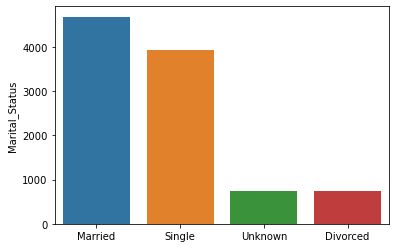

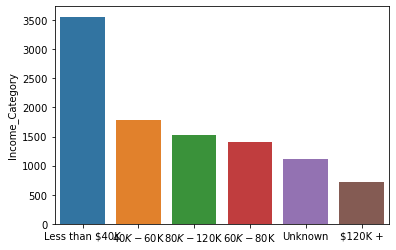

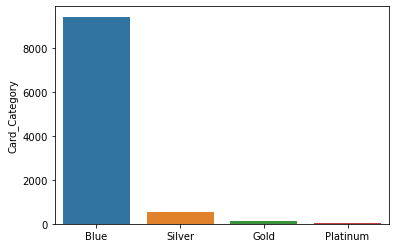

In [38]:
for var in var_cat:
    plt.figure()
    sns.barplot(x = df[var].value_counts().index, y = df[var].value_counts())

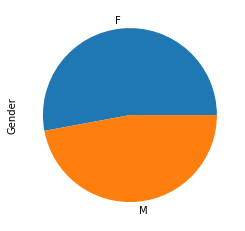

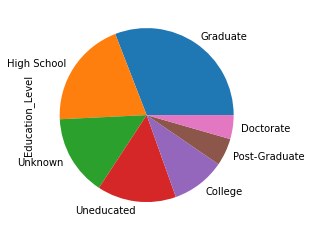

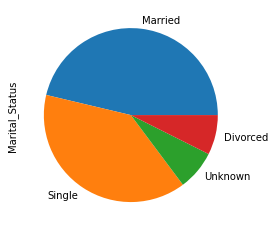

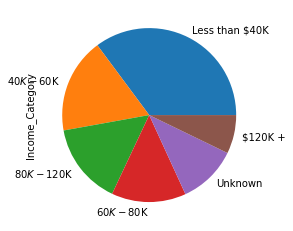

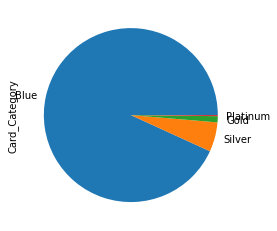

In [39]:
for var in var_cat:
    plt.figure()
    df[var].value_counts().plot.pie()

## Analyse bivariée: Target/variables numériques

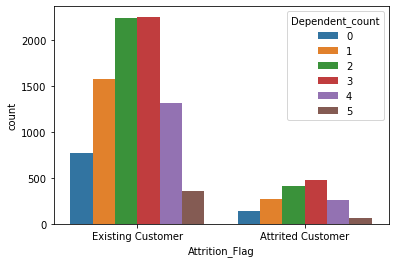

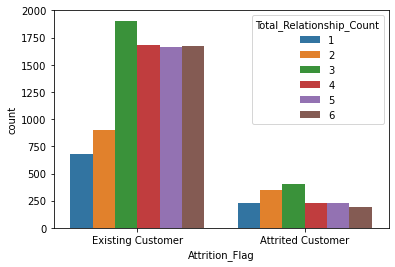

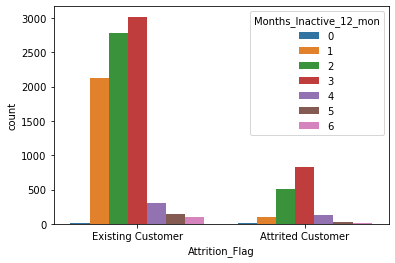

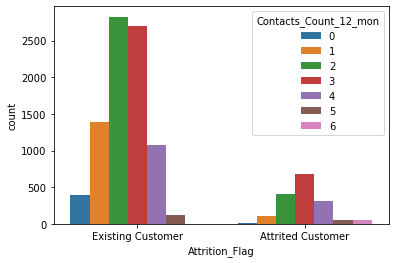

In [40]:
for var in discrete_var:
    plt.figure()
    sns.countplot(x = 'Attrition_Flag', hue = var, data = df)

In [41]:
# Divisons le dataset en 2 sous-ensembles: churn_df et non_churn_df

churn_df = df[df['Attrition_Flag'] == 'Attrited Customer']
non_churn_df = df[df['Attrition_Flag'] == 'Existing Customer']

In [42]:
print(len(churn_df))
print(len(non_churn_df))

1627
8500


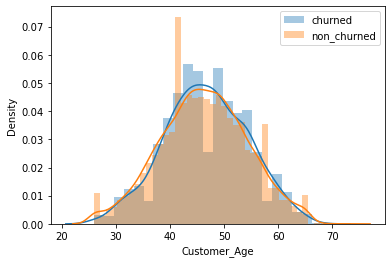

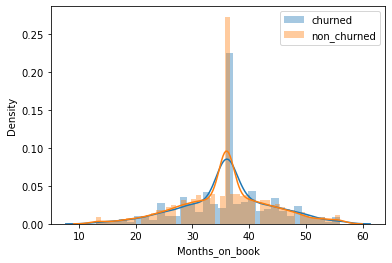

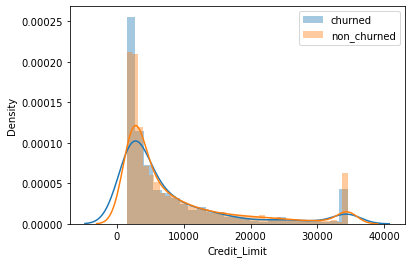

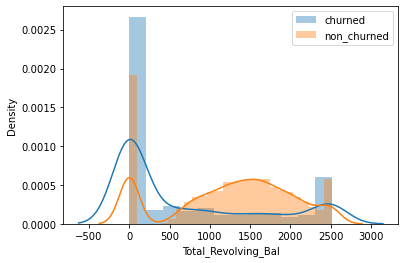

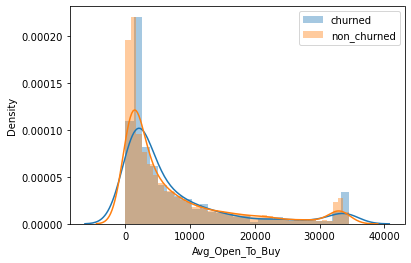

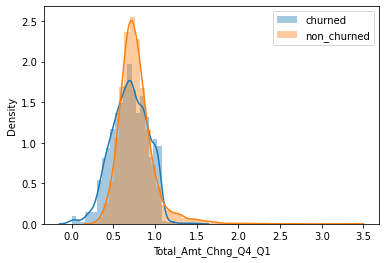

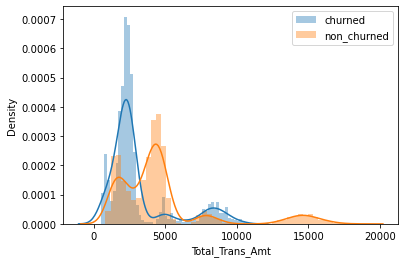

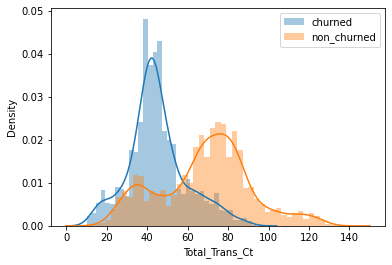

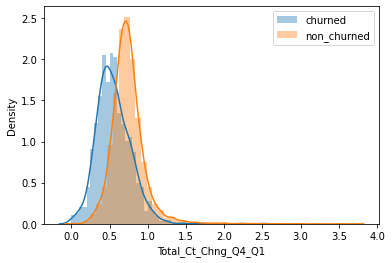

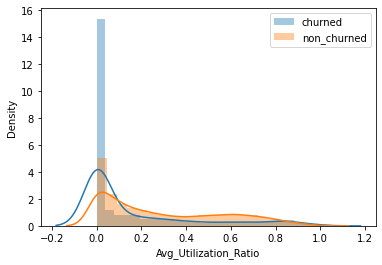

In [43]:
for col in var_num_cont:
    plt.figure()
    sns.distplot(churn_df[col], kde = True, label='churned')
    sns.distplot(non_churn_df[col], kde = True, label='non_churned')
    plt.legend()

## Analyse bivariée: Target/variables catégorielles

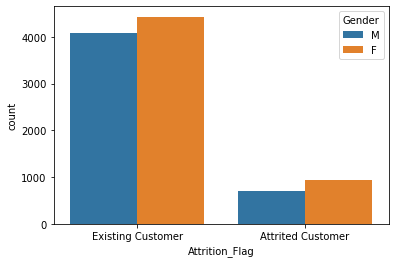

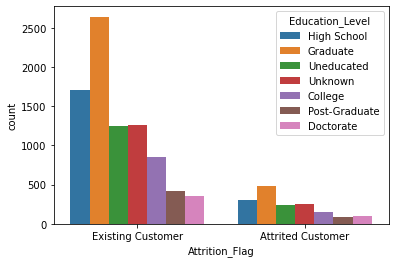

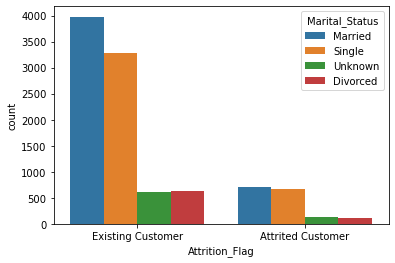

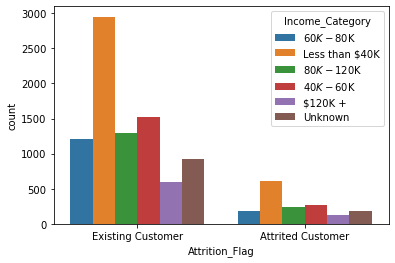

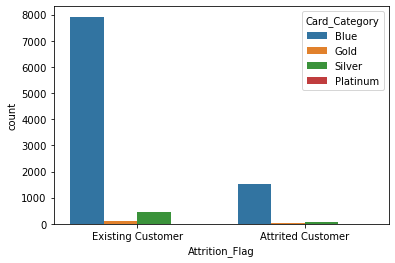

In [44]:
for var in var_cat:
    plt.figure()
    sns.countplot(x = 'Attrition_Flag', hue = var, data = df)

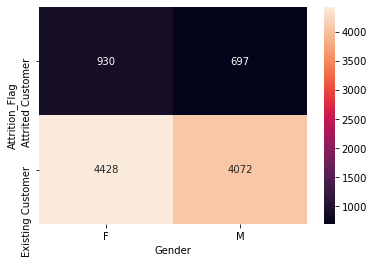

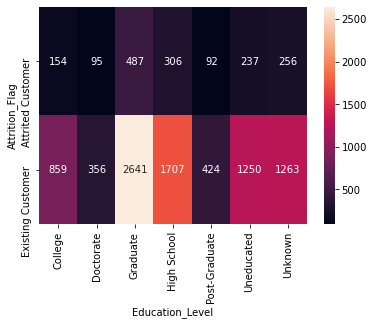

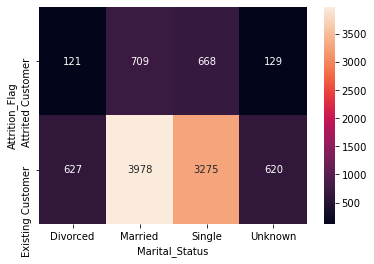

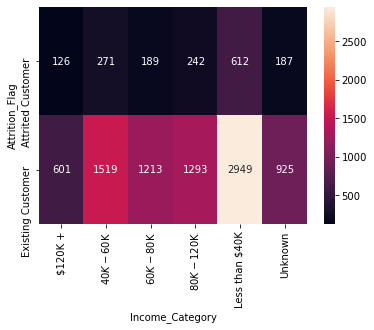

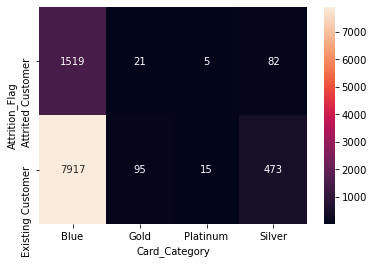

In [45]:
# Tableau de contingence entre les variables catégorielles et la target

for col in var_cat:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Attrition_Flag'],df[col]), annot = True, fmt = 'd')

In [ ]:
#for var in var_cat:
    #print(var)
    #for label in df[var].unique():
        #print(label+'_churn', (len(churn_df[var] == label))/ ((len(churn_df[var] == label) + (len(non_churn_df[var] == label))))
        #print(label+'_non_churn', (len(non_churn_df[var] == label))/ ((len(churn_df[var] == label) + (len(non_churn_df[var] == label))

### Analyse un peu avancée 

### Relation entre variables numériques

In [ ]:
ax = sns.pairplot(df[var_num_cont])

#### Il n'existe pas de relations linéaires entre toutes les variables numériques

<AxesSubplot:>

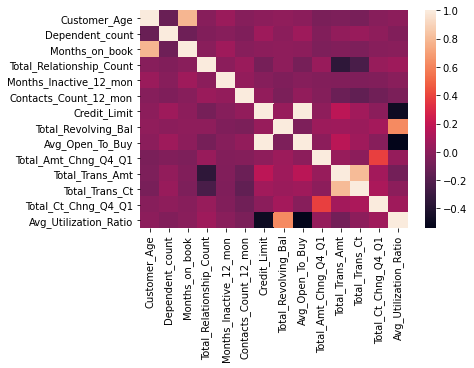

In [46]:
# Vérification de la corrélation entre les variables numériques

sns.heatmap(df[var_num].corr())

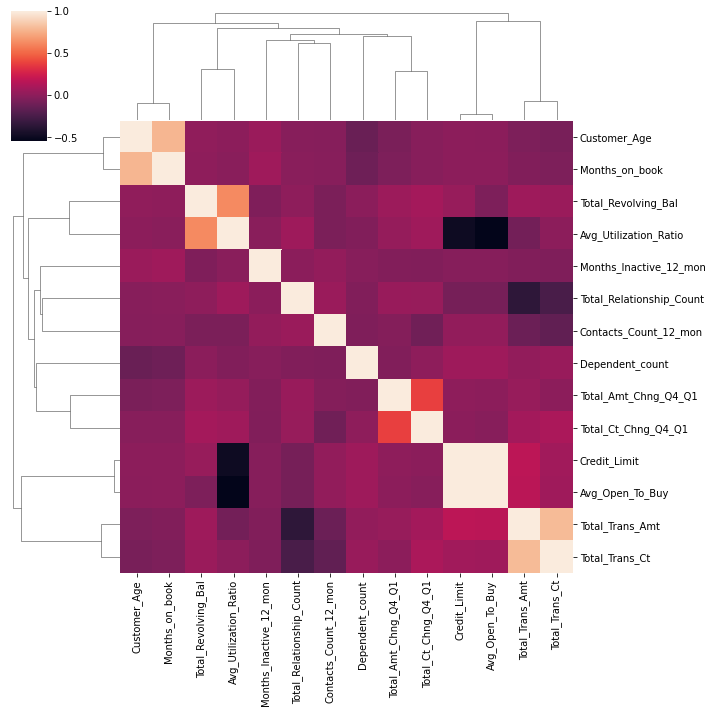

In [47]:
sns.clustermap(df[var_num].corr())

#### Il existe une correlation entre certaines variables. 

## Relation Salaire/Age

In [48]:
df.groupby('Income_Category')['Customer_Age'].median()

Income_Category
$120K +           49
$40K - $60K       46
$60K - $80K       46
$80K - $120K      47
Less than $40K    46
Unknown           46
Name: Customer_Age, dtype: int64

<AxesSubplot:xlabel='Income_Category'>

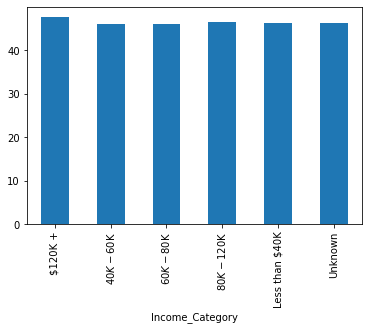

In [49]:
df.groupby('Income_Category')['Customer_Age'].mean().plot.bar()

#### Il n'existe à priori pas de relation entre l'age des clients et la catégorie de salaire. On peut s'amuser à faire test sataistique pour confirmer cela.

<AxesSubplot:xlabel='Education_Level'>

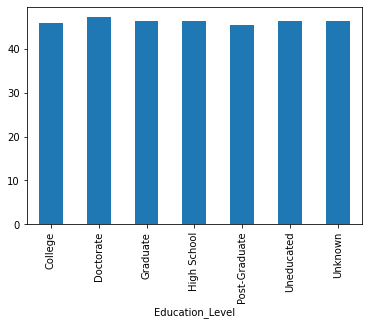

In [50]:
df.groupby('Education_Level')['Customer_Age'].mean().plot.bar()

#### Il n'existe à priori pas de relation entre l'age des clients et la catégorie de salaire. On peut s'amuser à faire test sataistique pour confirmer cela

<AxesSubplot:xlabel='Marital_Status'>

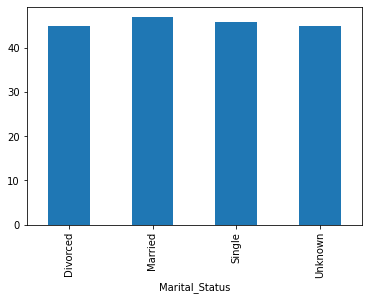

In [51]:
df.groupby('Marital_Status')['Customer_Age'].median().plot.bar()

## Tests statistiques

### On peut faire quelques tests statistiques pour connaître au mieux nos données et valider ou invalider certaines idées que nous avons eues en faisant une analyse descriptive de nos données

## H0: Il n'existe pas de différence significative entre les données de la variable numérique concernée et le statut du client

In [52]:
from scipy.stats import ttest_ind

In [53]:
balanced_non_churn = non_churn_df.sample(churn_df.shape[0])

In [54]:
def t_test(col):
    alpha = 0.05
    stat, p = ttest_ind(balanced_non_churn[col], churn_df[col])
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [56]:
for col in var_num:
    print(f'{col :-<50} {t_test(col)}')

Customer_Age-------------------------------------- 0
Dependent_count----------------------------------- 0
Months_on_book------------------------------------ 0
Total_Relationship_Count-------------------------- H0 Rejetée
Months_Inactive_12_mon---------------------------- H0 Rejetée
Contacts_Count_12_mon----------------------------- H0 Rejetée
Credit_Limit-------------------------------------- H0 Rejetée
Total_Revolving_Bal------------------------------- H0 Rejetée
Avg_Open_To_Buy----------------------------------- 0
Total_Amt_Chng_Q4_Q1------------------------------ H0 Rejetée
Total_Trans_Amt----------------------------------- H0 Rejetée
Total_Trans_Ct------------------------------------ H0 Rejetée
Total_Ct_Chng_Q4_Q1------------------------------- H0 Rejetée
Avg_Utilization_Ratio----------------------------- H0 Rejetée


## Test statistiques target par rapport aux variables catégorielles

In [57]:
from scipy.stats import chi2_contingency, chi2

In [ ]:
## Test de relation entre les variables Gender et Attrition_Flag

In [58]:
contingency_data = pd.crosstab(df['Gender'], df['Attrition_Flag'])

In [59]:
contingency_data

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


In [60]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Il existe un lien signification entre le sexe du client et le maintien ou pas de son service')
else:
    print('Pas de liens significatifs entre les variables Genre et Attrition Flag')

stat=13.866, p=0.000
Il existe un lien signification entre le sexe du client et le maintien ou pas de son service


In [ ]:
## Test de relation entre les variables Marital_Status et Attrition_Flag

In [61]:
Marital_Status = pd.crosstab(df['Attrition_Flag'] , df['Marital_Status'])
Marital_Status

Marital_Status,Divorced,Married,Single,Unknown
Attrition_Flag,,,,
Attrited Customer,121,709,668,129
Existing Customer,627,3978,3275,620


In [62]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
contingency_table = Marital_Status.values
print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
# interpret test-statistic
prob = 0.95
print('probability=%.3f, stat=%.3f' % (prob, stat))
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Les deux variables sont significativement dépendantes ( H0 rejeté)')
else:
	print('Les deux variables sont indépendantes (H0 retenu)')

[[ 121  709  668  129]
 [ 627 3978 3275  620]]
probability=0.950, stat=6.056
significance=0.050, p=0.109
Les deux variables sont indépendantes (H0 retenu)
